In [1]:
import numpy as np
import pandas as pd
import json

In [3]:
pathway_path = '../data/HALLMARK_APOPTOSIS.v2025.1.Hs.json'
gene_per_cluster_path = '../results_Jun2_suppl/top-trend-per-cluster.csv'
ranked_pair_path = '../results_Jun2_suppl/unique_A_regulated_df_top10_top100.csv'

In [14]:
gene_per_cluster = pd.read_csv(gene_per_cluster_path, index_col=0)
ranked_pair = pd.read_csv(ranked_pair_path, index_col=0)

In [5]:
with open(pathway_path, 'r') as f:
    pathway_data = json.load(f)

In [10]:
pathway_data['HALLMARK_APOPTOSIS']['geneSymbols']

['ADD1',
 'AIFM3',
 'ANKH',
 'ANXA1',
 'APP',
 'ATF3',
 'AVPR1A',
 'BAX',
 'BCAP31',
 'BCL10',
 'BCL2L1',
 'BCL2L10',
 'BCL2L11',
 'BCL2L2',
 'BGN',
 'BID',
 'BIK',
 'BIRC3',
 'BMF',
 'BMP2',
 'BNIP3L',
 'BRCA1',
 'BTG2',
 'BTG3',
 'CASP1',
 'CASP2',
 'CASP3',
 'CASP4',
 'CASP6',
 'CASP7',
 'CASP8',
 'CASP9',
 'CAV1',
 'CCNA1',
 'CCND1',
 'CCND2',
 'CD14',
 'CD2',
 'CD38',
 'CD44',
 'CD69',
 'CDC25B',
 'CDK2',
 'CDKN1A',
 'CDKN1B',
 'CFLAR',
 'CLU',
 'CREBBP',
 'CTH',
 'CTNNB1',
 'CYLD',
 'DAP',
 'DAP3',
 'DCN',
 'DDIT3',
 'DFFA',
 'DIABLO',
 'DNAJA1',
 'DNAJC3',
 'DNM1L',
 'DPYD',
 'EBP',
 'EGR3',
 'EMP1',
 'ENO2',
 'ERBB2',
 'ERBB3',
 'EREG',
 'ETF1',
 'F2',
 'F2R',
 'FAS',
 'FASLG',
 'FDXR',
 'FEZ1',
 'GADD45A',
 'GADD45B',
 'GCH1',
 'GNA15',
 'GPX1',
 'GPX3',
 'GPX4',
 'GSN',
 'GSR',
 'GSTM1',
 'GUCY2D',
 'H1-0',
 'HGF',
 'HMGB2',
 'HMOX1',
 'HSPB1',
 'IER3',
 'IFITM3',
 'IFNB1',
 'IFNGR1',
 'IGF2R',
 'IGFBP6',
 'IL18',
 'IL1A',
 'IL1B',
 'IL6',
 'IRF1',
 'ISG20',
 'JUN',
 'KRT18',

In [ ]:
gene_per_cluster_with_apoptotic_genes = gene_per_cluster[gene_per_cluster.index.isin(pathway_data['HALLMARK_APOPTOSIS']['geneSymbols'])]

In [24]:
ranked_pair

,target,pval,log10_pval,source_cluster,target_cluster
source,,,,,
ADNP2,SERPINB1,6.343974e-104,103.197639,3.0,3.0
ADNP2,TLCD1,1.433205e-85,84.843692,3.0,3.0
ADNP2,DBI,5.219494e-39,38.282372,3.0,0.0
ADNP2,BLVRB,5.089176e-31,30.293353,3.0,0.0
ADNP2,SECTM1,1.856120e-30,29.731394,3.0,3.0
...,...,...,...,...,...
ZNF92,GABARAPL1,1.637445e-26,25.785833,3.0,2.0
ZNF92,PLPP2,5.707171e-26,25.243579,3.0,3.0
ZNF92,SAV1,1.543213e-23,22.811574,3.0,2.0


In [29]:
ranked_pair.index.isin(pathway_data['HALLMARK_APOPTOSIS']['geneSymbols']).sum()

0

In [30]:
ranked_pair['target'].isin(pathway_data['HALLMARK_APOPTOSIS']['geneSymbols']).sum()

14

In [33]:
filtered_ranks = ranked_pair[ranked_pair['target'].isin(pathway_data['HALLMARK_APOPTOSIS']['geneSymbols'])]

In [34]:
filtered_ranks

,target,pval,log10_pval,source_cluster,target_cluster
source,,,,,
ARHGAP35,CREBBP,1.768223e-199,198.752463,0.0,4.0
ARID2,SPTAN1,1.289415e-33,32.889607,4.0,4.0
FLYWCH1,DAP,6.312957e-26,25.199767,0.0,1.0
GABPA,FDXR,1.012339e-28,27.994674,3.0,3.0
HES1,ISG20,6.039375e-24,23.219008,3.0,1.0
KLF3,DAP,5.899470e-76,75.229187,1.0,1.0
MAFK,DAP,3.473232e-26,25.459266,4.0,1.0
NKRF,CREBBP,6.858053e-38,37.163799,3.0,4.0
PAX9,IRF1,1.094818e-20,19.960658,3.0,3.0


In [44]:
filtered_ranks.to_csv('../results_Jun2_suppl/filtered_unique_A_regulated_df_top10_top100_apoptotic_genes.csv', index=False)

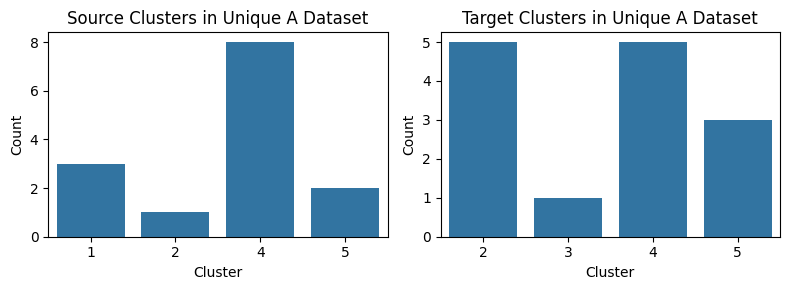

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))

sns.barplot(x=(filtered_ranks['source_cluster'].value_counts().index + 1).astype(int), 
            y=filtered_ranks['source_cluster'].value_counts().values, ax=ax1)
ax1.set_xlabel('Cluster')
ax1.set_ylabel('Count')
ax1.set_title('Source Clusters in Unique A Dataset')

sns.barplot(x=(filtered_ranks['target_cluster'].value_counts().index + 1).astype(int), 
            y=filtered_ranks['target_cluster'].value_counts().values, ax=ax2)
ax2.set_xlabel('Cluster')
ax2.set_ylabel('Count')
ax2.set_title('Target Clusters in Unique A Dataset')

plt.tight_layout()
plt.show()

In [45]:
ranked_pair

,target,pval,log10_pval,source_cluster,target_cluster
source,,,,,
ADNP2,SERPINB1,6.343974e-104,103.197639,3.0,3.0
ADNP2,TLCD1,1.433205e-85,84.843692,3.0,3.0
ADNP2,DBI,5.219494e-39,38.282372,3.0,0.0
ADNP2,BLVRB,5.089176e-31,30.293353,3.0,0.0
ADNP2,SECTM1,1.856120e-30,29.731394,3.0,3.0
...,...,...,...,...,...
ZNF92,GABARAPL1,1.637445e-26,25.785833,3.0,2.0
ZNF92,PLPP2,5.707171e-26,25.243579,3.0,3.0
ZNF92,SAV1,1.543213e-23,22.811574,3.0,2.0
